# Binaural Audio

**Harper Friedman**

**CSC 497 Project**

**What is binaural audio?**

Binaural audio is loosely defined as two-channel audio that has been filtered or recorded to sound like how humans hear. Unlike stereo audio, which is an audio technique using two independent audio channels to produce a 3D perspective, binaural audio takes into account variables such as your head attentuating the signal or the folds of your outer ear (the pinna) and thus the sound appears to be coming from outside of the listener’s head at some appropriate point in space. It is being used in Virtual and Augmented Reality to create a more immersive user experience.

**Binaural audio techniques**

The two ways you can achieve binaural audio is either by recording it or synthesizing it.

When you record binaural audio, a dummy head with realistic pinna is used to replicate a human listener, placing microphones in what would be the ear canals to capture the sound. This technique produces 
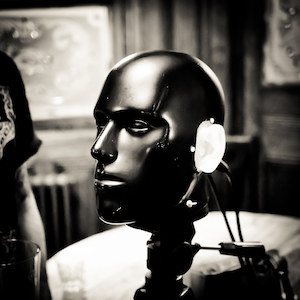
<center><a href="https://www.flickr.com/photos/59945848@N05/8056227563">"Listening"</a> by <a href="https://www.flickr.com/photos/59945848@N05Robin">Robin Baumgarten</a> is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/2.0/?ref=ccsearch&atype=rich">CC BY-NC-SA 2.0</a></center>

When you synthesize binaural audio, you use filters called Head-Related Transfer Functions (HRTFs) to filter the audio and create that accurate representation. This is the technique we will be explaining in this Notebook. This technique is the most dynamic of the two as one can filter different sounds and also have the sound originate from anywhere in the 3D plane. This means that it is the best fit in a virtual reality application as you can make the sounds move and you can account for the turning of the head.

Before we start exploring synthesizing binaural audio, we'll take a look at stereo audio and some techniques used in panning.

In [73]:
#Libraries imported
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import math

In [74]:
#Function that generates a sinusoid
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

sr = 44100.0 #defining the sample rate

## Stereo Panning

We'll start by creating two sinusoids, one for the left channel and one for the right. The amplitude of these signals are the same so it sounds like the sinusoid is centred.

In [75]:
left = sinusoid(dur=2.0, amp=0.5)
right = sinusoid(dur=2.0, amp=0.5)
channel = [left, right]
#print(channel)
ipd.Audio(channel, rate=sr)

When the amplitude in the right signal is greater, it sounds like the sound is coming from the right.

In [76]:
left = sinusoid(dur=2.0, amp=0.2)
right = sinusoid(dur=2.0, amp=0.8)
channel = [left, right]
#print(channel)
ipd.Audio(channel, rate=sr)

Similarly, when the amplitude in the left signal is greater, it sounds like the sound is coming from the left.

This is because when we hear a sound that is louder in one ear over the other, we understand that as the sound being closer to that ear.

In [77]:
left = sinusoid(dur=2.0, amp=0.8)
right = sinusoid(dur=2.0, amp=0.2)
channel = [left, right]
#print(channel)
ipd.Audio(channel, rate=sr)

### Linear Panning

The simplest way to change the volume of the channels, and thus the perception of the position of the sound source, is linear panning. The idea is that the signal should have a total gain of $1$ and thus the left and right channels should sum together to equal 1 ($ L(\theta) + R(\theta) = 1 $).

This is what we used in our previous examples. In the first example, the amplitude of the left signal was $0.5$ and the right was $0.5$. Taking the sum, we see that $ 0.5 + 0.5 = 1 $. In the second and third examples, one channel's amplitude was $0.2$ and the other was $0.8$. Taking the sum, we see that $0.2 + 0.8 = 1$.

With a panning angle $\theta\in [0;\frac{\pi}{2}]$, we define the gain functions as $L(\theta) = (\frac{\pi}{2} - \theta)\frac{2}{\pi}$ and $R(\theta) = \theta\frac{2}{\pi}$

### Constant Power Panning

### -4.5dB Pan Law